# Data Oriented Programming Paradigms - Exercise 3
<h3> Preprocessing "cwurData.csv" </h3>

In [5]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing
from scipy import stats
from fancyimpute import KNN
#Using TensorFlow backend.

Using TensorFlow backend.


In [6]:
# Read CSV file-
cwur_data = pd.read_csv("cwurData.csv")

In [7]:
# Get shape/dimension of data-
cwur_data.shape

(2200, 14)

In [8]:
# Get information about dataset-
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [6]:
# Check for missing value(s)-
cwur_data.isnull().values.any()

True

In [7]:
# Get column/attribute names containing NAs-
cwur_data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [8]:
# Get number of unique values for 'institution' column-
len(cwur_data['institution'].unique().tolist())

1024

In [9]:
# Get number of unique values for 'country' column-
len(cwur_data['country'].unique().tolist())

59

In [10]:
# Do label encoding for the 2 columns. Transform Categories into Integers-
labelencoder = preprocessing.LabelEncoder()
labelencoder2 = preprocessing.LabelEncoder()

labelencoder.fit(cwur_data['institution'])
labelencoder2.fit(cwur_data['country'])

LabelEncoder()

In [11]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_institution = labelencoder.transform(cwur_data['institution'])
encoded_country = labelencoder2.transform(cwur_data['country'])

In [12]:
# Add new columns to DataFrame-
cwur_data['encoded_institution'] = encoded_institution
cwur_data['encoded_country'] = encoded_country

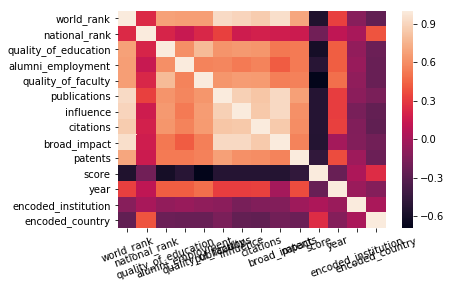

In [13]:
# Visualizations:

# Columns to use for visualization-
cols_to_use = []
cols_to_use = cwur_data.columns.tolist()

# Remove the following 2 columns from list-                            
cols_to_use.remove('country')
cols_to_use.remove('institution')

# Compute correlation for columns in 'cols_to_use'-
corr_mat = cwur_data.loc[:, cols_to_use].corr()

# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

# We can use the correlation graph for further exploratory analysis!

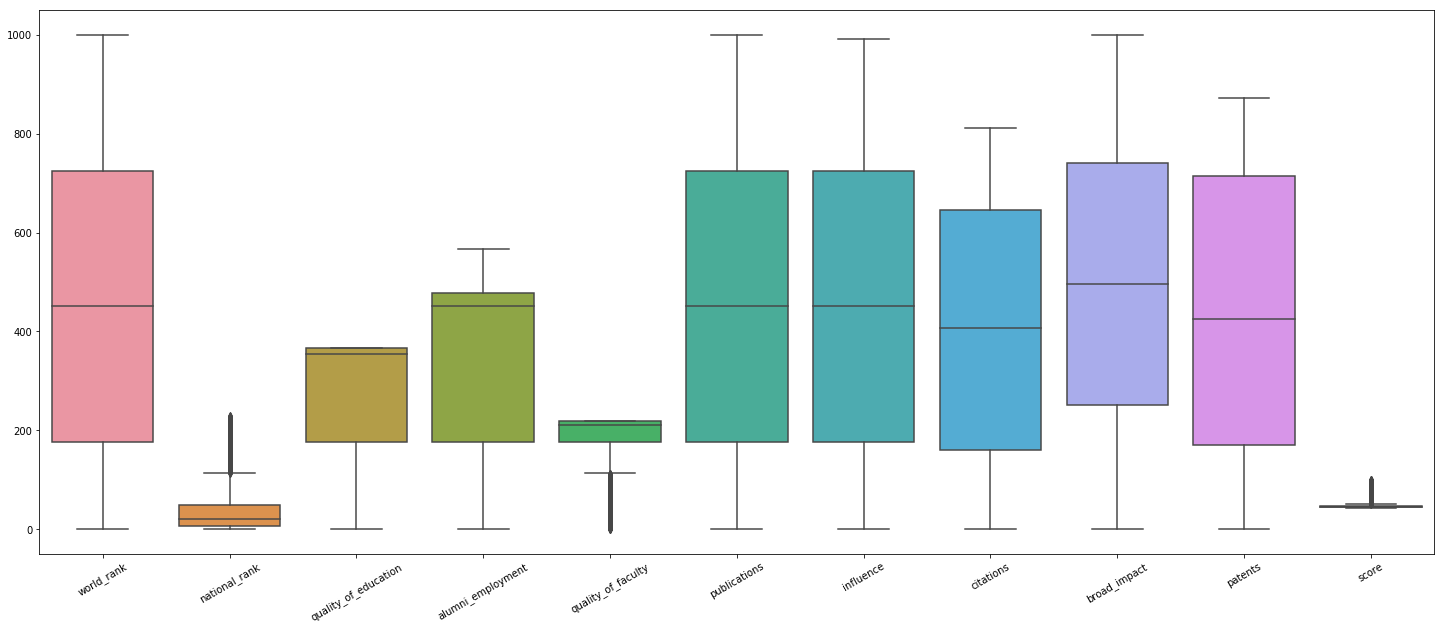

In [15]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_to_use.copy()

# Remove the following columns/attributes-
cols_boxplot.remove('year')
cols_boxplot.remove('encoded_country')
cols_boxplot.remove('encoded_institution')



# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = cwur_data.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

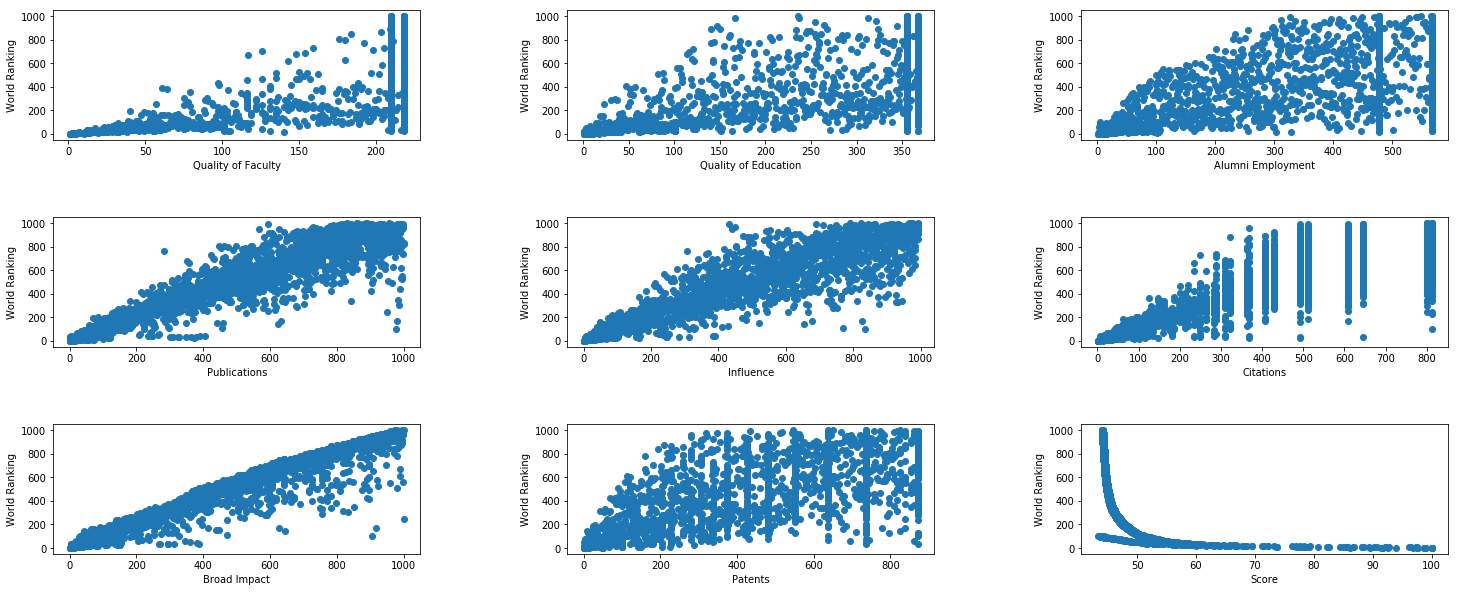

In [16]:
# Draw multiple plots together-
# Scatter plot of different attributes with 'world_rank' attribute to see correlation


fig, ax = plt.subplots(3, 3)

# Adjust spacing between plots-
fig.subplots_adjust(hspace = 0.6, wspace = 0.4)

ax[0, 0].scatter(cwur_data["quality_of_faculty"], cwur_data["world_rank"])
ax[0, 0].set_xlabel("Quality of Faculty")
ax[0, 0].set_ylabel("World Ranking")

ax[0, 1].scatter(cwur_data["quality_of_education"], cwur_data["world_rank"])
ax[0, 1].set_xlabel("Quality of Education")
ax[0, 1].set_ylabel("World Ranking")

ax[0, 2].scatter(cwur_data["alumni_employment"], cwur_data["world_rank"])
ax[0, 2].set_xlabel("Alumni Employment")
ax[0, 2].set_ylabel("World Ranking")

ax[1, 0].scatter(cwur_data["publications"], cwur_data["world_rank"])
ax[1, 0].set_xlabel("Publications")
ax[1, 0].set_ylabel("World Ranking")

ax[1, 1].scatter(cwur_data["influence"], cwur_data["world_rank"])
ax[1, 1].set_xlabel("Influence")
ax[1, 1].set_ylabel("World Ranking")

ax[1, 2].scatter(cwur_data["citations"], cwur_data["world_rank"])
ax[1, 2].set_xlabel("Citations")
ax[1, 2].set_ylabel("World Ranking")

ax[2, 0].scatter(cwur_data["broad_impact"], cwur_data["world_rank"])
ax[2, 0].set_xlabel("Broad Impact")
ax[2, 0].set_ylabel("World Ranking")

ax[2, 1].scatter(cwur_data["patents"], cwur_data["world_rank"])
ax[2, 1].set_xlabel("Patents")
ax[2, 1].set_ylabel("World Ranking")

ax[2, 2].scatter(cwur_data["score"], cwur_data["world_rank"])
ax[2, 2].set_xlabel("Score")
ax[2, 2].set_ylabel("World Ranking")

plt.show()


# Further Data Visualization

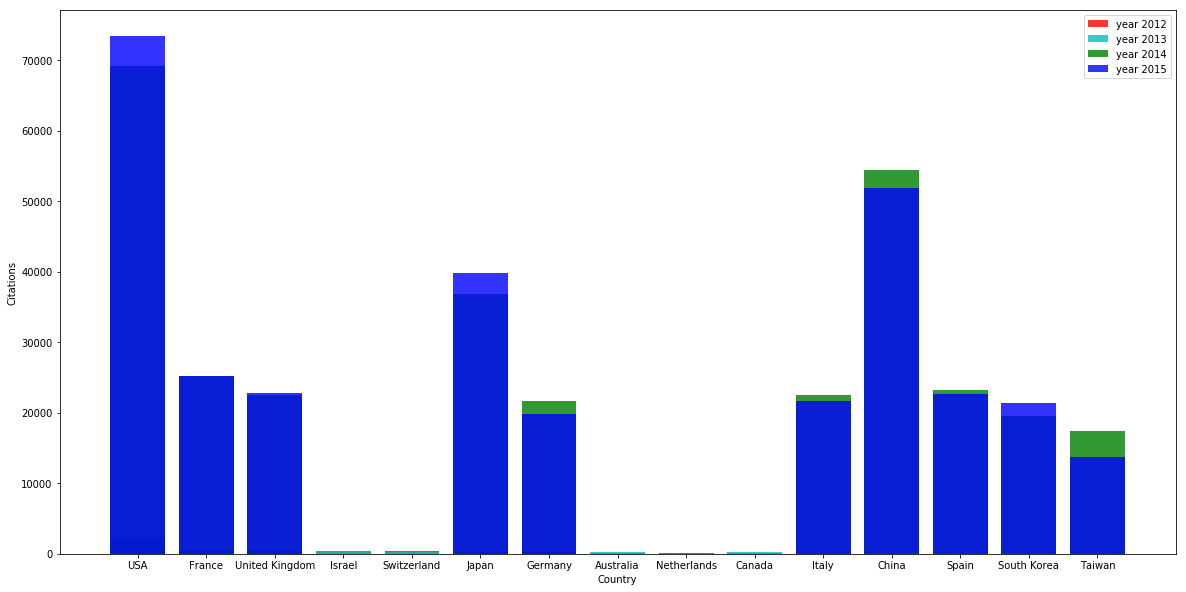

In [14]:
#it would be interesting to see, which countries were cited the most per year:

citation_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['citations'].agg('sum')).reset_index().sort_values(by=['year', 'citations'],ascending=False)
citation_data = citation_data.set_index(['country']).groupby('year')['citations'].nlargest(10).reset_index() 
citation_data

cit_2012 = citation_data.loc[citation_data['year'] == 2012].loc[:,'citations'].values
cit_2013 = citation_data.loc[citation_data['year'] == 2013].loc[:,'citations'].values
cit_2014 = citation_data.loc[citation_data['year'] == 2014].loc[:,'citations'].values
cit_2015 = citation_data.loc[citation_data['year'] == 2015].loc[:,'citations'].values

country_2012 = citation_data.loc[citation_data['year'] == 2012].loc[:,'country'].values
country_2013 = citation_data.loc[citation_data['year'] == 2013].loc[:,'country'].values
country_2014 = citation_data.loc[citation_data['year'] == 2014].loc[:,'country'].values
country_2015 = citation_data.loc[citation_data['year'] == 2015].loc[:,'country'].values

plt.figure(figsize=(20,10))
plt.bar(country_2012, cit_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, cit_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, cit_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, cit_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("Citations")
plt.xlabel("Country")


plt.show()

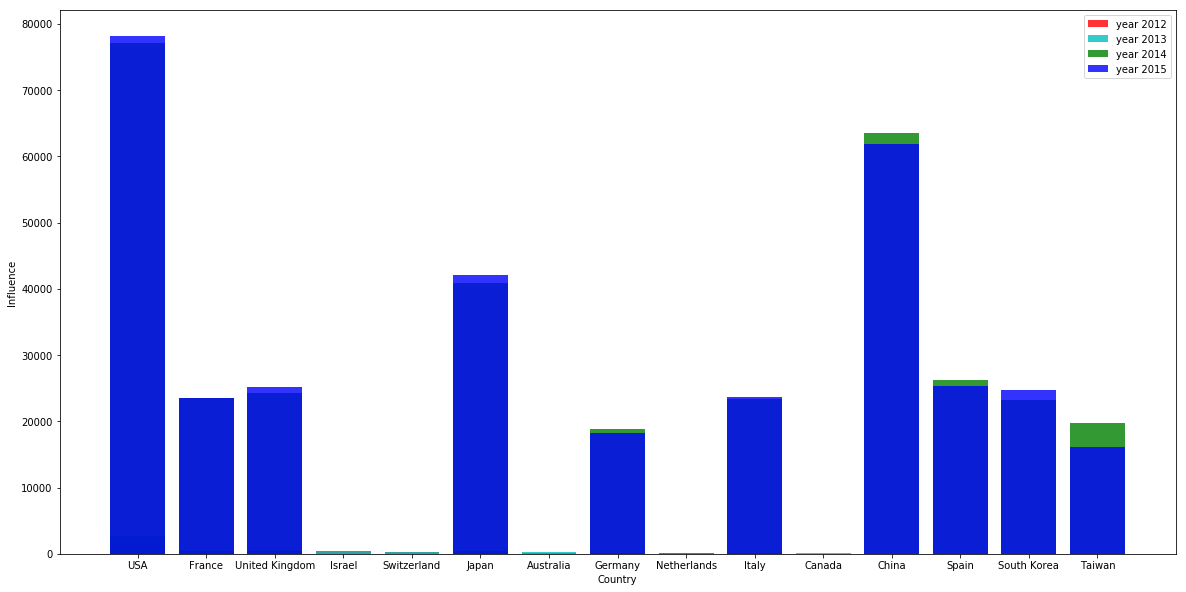

In [18]:
# similarly as above just instead of citations we are interestd in the influence of a given
# country

influence_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['influence'].agg('sum')).reset_index().sort_values(by=['year', 'influence'],ascending=False)
influence_data = influence_data.set_index(['country']).groupby('year')['influence'].nlargest(10).reset_index() 

inf_2012 = influence_data.loc[influence_data['year'] == 2012].loc[:,'influence'].values
inf_2013 = influence_data.loc[influence_data['year'] == 2013].loc[:,'influence'].values
inf_2014 = influence_data.loc[influence_data['year'] == 2014].loc[:,'influence'].values
inf_2015 = influence_data.loc[influence_data['year'] == 2015].loc[:,'influence'].values

country_2012 = influence_data.loc[influence_data['year'] == 2012].loc[:,'country'].values
country_2013 = influence_data.loc[influence_data['year'] == 2013].loc[:,'country'].values
country_2014 = influence_data.loc[influence_data['year'] == 2014].loc[:,'country'].values
country_2015 = influence_data.loc[influence_data['year'] == 2015].loc[:,'country'].values

plt.figure(figsize=(20,10))
plt.bar(country_2012, inf_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, inf_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, inf_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, inf_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("Influence")
plt.xlabel("Country")

plt.show()

# this plot is very similar to the above one (we are not surprised,
# as influence and citations should be correlated).


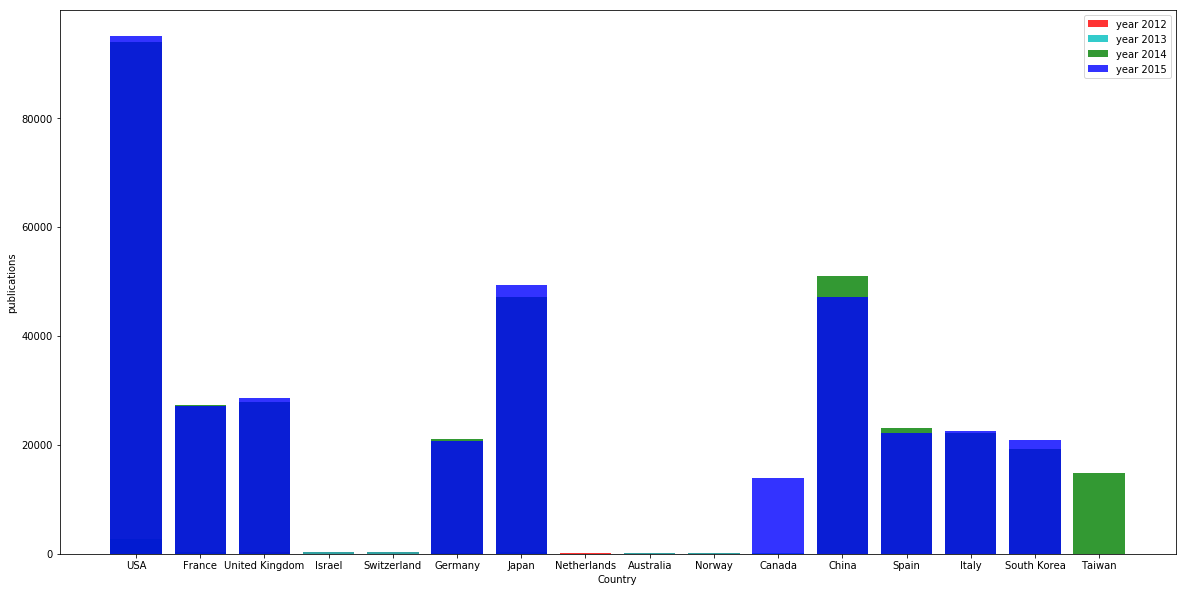

In [20]:
#let's see what happens with the publications:

publ_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['publications'].agg('sum')).reset_index().sort_values(by=['year', 'publications'],ascending=False)
publ_data = publ_data.set_index(['country']).groupby('year')['publications'].nlargest(10).reset_index() 

pub_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'publications'].values
pub_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'publications'].values
pub_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'publications'].values
pub_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'publications'].values

country_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'country'].values
country_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'country'].values
country_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'country'].values
country_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'country'].values

plt.figure(figsize=(20,10))
plt.bar(country_2012, pub_2012, align='center', alpha=0.8, color='r', label="year 2012")
plt.bar(country_2013, pub_2013, align='center', alpha=0.8, color='c', label="year 2013")
plt.bar(country_2014, pub_2014, align='center', alpha=0.8, color='g', label="year 2014")
plt.bar(country_2015, pub_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.legend(loc = 'upper right')
plt.ylabel("publications")
plt.xlabel("Country")

plt.show()

# Taiwan seemed to be very active in 2014

<Figure size 1440x720 with 0 Axes>

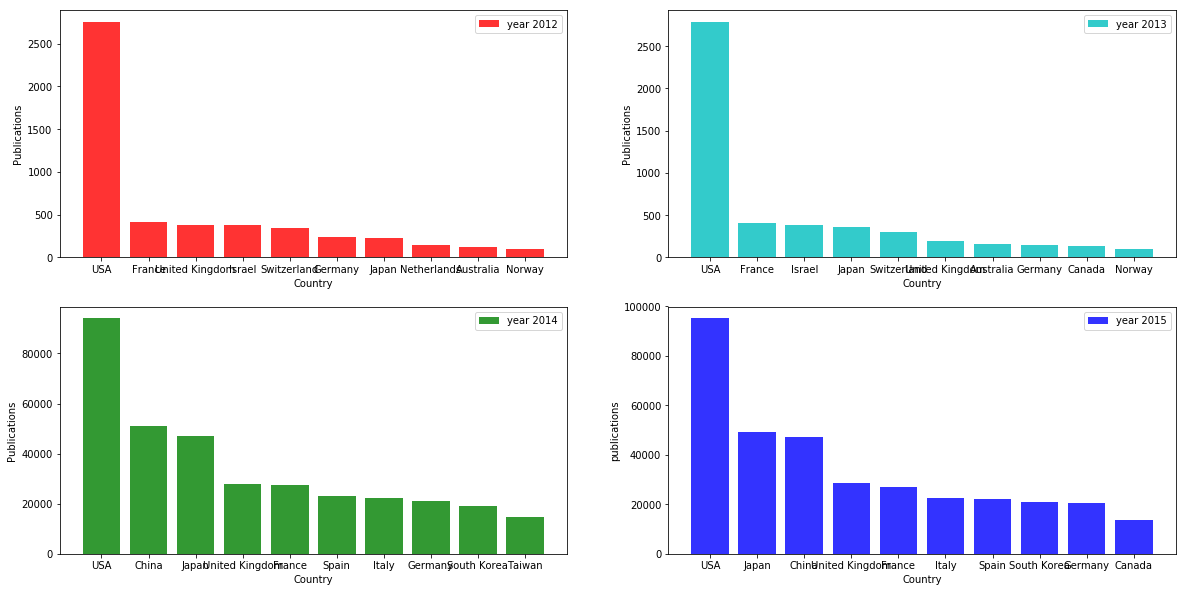

In [23]:
# the scale of the "publications" variable is not consistent, it would be
# beneficial to see whether the ratios between tha number of publications per cpuntry
# remains similar among the years, this could validate the "trustworthyness" of the data.

publ_data = pd.DataFrame(cwur_data.groupby(['country', 'year'])['publications'].agg('sum')).reset_index().sort_values(by=['year', 'publications'],ascending=False)
publ_data = publ_data.set_index(['country']).groupby('year')['publications'].nlargest(10).reset_index() 

pub_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'publications'].values
pub_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'publications'].values
pub_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'publications'].values
pub_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'publications'].values

country_2012 = publ_data.loc[publ_data['year'] == 2012].loc[:,'country'].values
country_2013 = publ_data.loc[publ_data['year'] == 2013].loc[:,'country'].values
country_2014 = publ_data.loc[publ_data['year'] == 2014].loc[:,'country'].values
country_2015 = publ_data.loc[publ_data['year'] == 2015].loc[:,'country'].values


fig, axes = plt.subplots(2, 2,figsize=(20,10))

axes[0, 0].bar(country_2012, pub_2012, align='center', alpha=0.8, color='r', label="year 2012")
axes[0, 0].set_xlabel("Country")
axes[0, 0].set_ylabel("Publications")
axes[0, 0].legend(loc = 'upper right')

axes[0, 1].bar(country_2013, pub_2013, align='center', alpha=0.8, color='c', label="year 2013")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Publications")
axes[0, 1].legend(loc = 'upper right')

axes[1, 0].bar(country_2014, pub_2014, align='center', alpha=0.8, color='g', label="year 2014")
axes[1, 0].set_xlabel("Country")
axes[1, 0].set_ylabel("Publications")
axes[1, 0].legend(loc = 'upper right')

axes[1, 1].bar(country_2015, pub_2015, align='center', alpha=0.8, color='b', label="year 2015")
plt.ylabel("publications")
plt.xlabel("Country")
plt.legend(loc = 'upper right')

plt.show()

In [18]:
# Dropping column broad_impact because it has many missing values and is also kind of useless
neshtositam.drop(["broad_impact"], axis=1, inplace=True)

In [19]:
neshtositam.isnull().values.any()

False

In [20]:
# This will show the dataframe only with the numerical values
columns = neshtositam.columns.tolist()
columns = columns[3:12]
bezimenna = neshtositam[columns]
bezimenna

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1,7,9,1,1,1,1,5,100.00
1,2,9,17,3,12,4,4,1,91.67
2,3,17,11,5,4,2,2,15,89.50
3,1,10,24,4,16,16,11,50,86.17
4,4,2,29,7,37,22,22,18,85.21
5,5,8,14,2,53,33,26,101,82.50
6,2,13,28,9,15,13,19,26,82.34
7,6,14,31,12,14,6,15,66,79.14
8,7,23,21,10,13,12,14,5,78.86
9,8,16,52,6,6,5,3,16,78.55


In [21]:
# Calculates z-scores in order to witness any outliers
z = np.abs(stats.zscore(bezimenna))
for i in range(0, len(z)):
        for j in range(0, len(z[i])):
            if z[i][j] > 4:
                print(bezimenna.index.get_values()[i])
                print(z[i][j])

221
5.6782270809
234
4.51586107428
234
5.6782270809
234
5.17281335332
236
4.28643739077
239
4.95941352906
239
5.38481605629
247
5.17281335332
264
4.36630974149
272
5.17281335332
299
4.16541110405
299
4.36630974149
1222
4.00542476862
1228
4.66881019662
1233
4.00542476862
1235
4.19928346383
1236
4.77587458225
1236
7.71235469264
1236
6.25352819317
1237
5.18883721256
1237
5.46949695575
1237
4.00542476862
1256
4.83408183635
1258
6.17287783199
1270
5.22120357003
1297
4.40251762254


In [22]:
#The following code checks if there are universities with the same name, but with different countries. It prints them, if they exist. They do not.
neshtositam = neshtositam.reset_index()
listche = neshtositam['institution'].unique().tolist()
for i in range(len(listche)):
    current = listche[i]
    country = ""
    for j in range(len(neshtositam)):        
        if neshtositam['institution'].loc[j] == listche[i]:
            if country == "":
                country = neshtositam['country'].loc[j]
            if country != neshtositam['country'].loc[j]:
                print(current)
                print(country)

In [23]:
# This fixes index problems from previous code snippet
normalizedData = neshtositam
normalizedData.drop(["index"], axis=1, inplace=True)

In [24]:
# Scaling the data
normalizedData['quality_of_education'] = [round(100-(100*(number - neshtositam['quality_of_education'].min())/(neshtositam['quality_of_education'].max() - neshtositam['quality_of_education'].min())),2) 
                         for number in neshtositam['quality_of_education']]

normalizedData['alumni_employment'] = [round(100-(100*(number - neshtositam['alumni_employment'].min())/(neshtositam['alumni_employment'].max() - neshtositam['alumni_employment'].min())),2) 
                         for number in neshtositam['alumni_employment']]

normalizedData['quality_of_faculty'] = [round(100 - (100*(number - neshtositam['quality_of_faculty'].min())/(neshtositam['quality_of_faculty'].max() - neshtositam['quality_of_faculty'].min())),2) 
                         for number in neshtositam['quality_of_faculty']]

normalizedData['publications'] = [round(100-(100*(number - neshtositam['publications'].min())/(neshtositam['publications'].max() - neshtositam['publications'].min())),2)
                         for number in neshtositam['publications']]

normalizedData['influence'] = [round(100-(100*(number - neshtositam['influence'].min())/(neshtositam['influence'].max() - neshtositam['influence'].min())) ,2)
                         for number in neshtositam['influence']]

normalizedData['citations'] = [round(100-(100*(number - neshtositam['citations'].min())/(neshtositam['citations'].max() - neshtositam['citations'].min())),2)
                         for number in neshtositam['citations']]

normalizedData['patents'] = [round(100-(100*(number - neshtositam['patents'].min())/(neshtositam['patents'].max() - neshtositam['patents'].min())),2) 
                         for number in neshtositam['patents']]

normalizedData

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,encoded_institution,encoded_country
0,1,Harvard University,USA,1,98.36,98.59,100.00,100.00,100.00,100.00,99.54,100.00,2012,184,54
1,2,Massachusetts Institute of Technology,USA,2,97.81,97.17,99.08,97.28,99.23,99.53,100.00,91.67,2012,312,54
2,3,Stanford University,USA,3,95.63,98.23,98.16,99.26,99.74,99.84,98.39,89.50,2012,511,54
3,4,University of Cambridge,United Kingdom,1,97.54,95.94,98.62,96.30,96.13,98.45,94.37,86.17,2012,637,57
4,5,California Institute of Technology,USA,4,99.73,95.05,97.24,91.11,94.59,96.74,98.05,85.21,2012,53,54
5,6,Princeton University,USA,5,98.09,97.70,99.54,87.16,91.75,96.12,88.51,82.50,2012,432,54
6,7,University of Oxford,United Kingdom,2,96.72,95.23,96.31,96.54,96.91,97.20,97.13,82.34,2012,819,57
7,8,Yale University,USA,6,96.45,94.70,94.93,96.79,98.71,97.83,92.53,79.14,2012,999,54
8,9,Columbia University,USA,7,93.99,96.47,95.85,97.04,97.16,97.98,99.54,78.86,2012,96,54
9,10,"University of California, Berkeley",USA,8,95.90,90.99,97.70,98.77,98.97,99.69,98.28,78.55,2012,627,54


In [88]:
def countriesCount(durjavichki):
    durjavichki = durjavichki.sort_values()
    durjavichki = durjavichki.reset_index()
    durjavichki.drop(["index"], axis=1, inplace=True)
    #durjavichki[:100]

    listDurjava = []
    imeDurjava = durjavichki.iloc[0][0]
    stoinost = 1
    for i in range(1, len(durjavichki) - 1):

        if durjavichki.iloc[i][0] == imeDurjava:
            stoinost = stoinost + 1
        if durjavichki.iloc[i][0] != imeDurjava:
            curTuple = (stoinost, imeDurjava)
            listDurjava.append(curTuple)
            stoinost = 1
            imeDurjava = durjavichki.iloc[i][0]

    #print(listDurjava)
    dfDurjava = pd.DataFrame(listDurjava)
    dfDurjava = dfDurjava.rename(columns = {0: "Frequency",  1:"Name of country"}) 
    dfDurjava = dfDurjava.sort_values("Frequency", ascending=False)
    dfDurjava = dfDurjava.reset_index()
    dfDurjava.drop(["index"], axis=1, inplace=True)
    return dfDurjava
    
print(countriesCount(normalizedData[:100].country)) 
print(countriesCount(normalizedData[100:200].country)) 
print(countriesCount(normalizedData[200:300].country)) 
print(countriesCount(normalizedData[300:].country)) 

    Frequency Name of country
0          58             USA
1           5          France
2           5           Japan
3           4          Israel
4           4     Switzerland
5           3          Canada
6           3         Germany
7           2       Australia
8           2     Netherlands
9           1         Denmark
10          1         Finland
11          1           Italy
12          1          Norway
13          1     South Korea
14          1          Sweden
    Frequency Name of country
0          57             USA
1           6           Japan
2           5          France
3           4          Israel
4           4          Canada
5           4     Switzerland
6           2         Germany
7           2       Australia
8           1         Denmark
9           1         Finland
10          1           Italy
11          1     Netherlands
12          1          Norway
13          1          Russia
14          1       Singapore
15          1     South Korea
16        

# Preprocessing "shanghaiData.csv"

In [21]:
# Change directory to data directory-
os.chdir("./Kaggle-Dataset/")

In [22]:
# Read CSV file-
shanghai_data = pd.read_csv("shanghaiData.csv")

In [23]:
# Get dimension/shape of dataset-
shanghai_data.shape

(4897, 11)

In [24]:
# Get information about dataset-
shanghai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
world_rank         4897 non-null object
university_name    4896 non-null object
national_rank      4896 non-null object
total_score        1101 non-null float64
alumni             4896 non-null float64
award              4895 non-null float64
hici               4895 non-null float64
ns                 4875 non-null float64
pub                4895 non-null float64
pcp                4895 non-null float64
year               4897 non-null int64
dtypes: float64(7), int64(1), object(3)
memory usage: 420.9+ KB


In [26]:
# Check for missing values in dataset-
shanghai_data.isnull().values.any()

True

In [27]:
# Check for missing values (Sum of them)-
shanghai_data.isnull().sum().sum()

3829

In [28]:
# Get names of attributes having missing values-
shanghai_data.isnull().sum()

world_rank            0
university_name       1
national_rank         1
total_score        3796
alumni                1
award                 2
hici                  2
ns                   22
pub                   2
pcp                   2
year                  0
dtype: int64

In [29]:
# Impute missing values using knn-

# Attributes for which missing values will be imputed using knn-
cols_to_use = ['total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

In [30]:
# Use k = 3 nearest rows which have a feature to fill in for each row's missing features-
shanghai_data_filled_na = KNN(k=3).fit_transform(shanghai_data.loc[:, cols_to_use])

Imputing row 1/4897 with 0 missing, elapsed time: 3.888
Imputing row 101/4897 with 1 missing, elapsed time: 3.889
Imputing row 201/4897 with 1 missing, elapsed time: 3.894
Imputing row 301/4897 with 1 missing, elapsed time: 3.898
Imputing row 401/4897 with 1 missing, elapsed time: 3.901
Imputing row 501/4897 with 0 missing, elapsed time: 3.905
Imputing row 601/4897 with 0 missing, elapsed time: 3.905
Imputing row 701/4897 with 1 missing, elapsed time: 3.910
Imputing row 801/4897 with 1 missing, elapsed time: 3.914
Imputing row 901/4897 with 1 missing, elapsed time: 3.917
Imputing row 1001/4897 with 0 missing, elapsed time: 3.921
Imputing row 1101/4897 with 0 missing, elapsed time: 3.921
Imputing row 1201/4897 with 1 missing, elapsed time: 3.926
Imputing row 1301/4897 with 1 missing, elapsed time: 3.930
Imputing row 1401/4897 with 1 missing, elapsed time: 3.933
Imputing row 1501/4897 with 1 missing, elapsed time: 3.937
Imputing row 1601/4897 with 0 missing, elapsed time: 3.938
Imputing 

In [31]:
# Dimension of missing values imputed dataset-
shanghai_data_filled_na.shape

(4897, 7)

In [32]:
# Convert 'shanghai_data_filled_na' from numpy to pandas DataFrame-
shanghai_data_filled_na = pd.DataFrame(shanghai_data_filled_na, columns = cols_to_use)

In [33]:
# Add the 4 attributes to 'shanghai_data_filled_na' from 'shanghai_data'-
shanghai_data_filled_na['world_rank'] = shanghai_data['world_rank']
shanghai_data_filled_na['university_name'] = shanghai_data['university_name']
shanghai_data_filled_na['national_rank'] = shanghai_data['national_rank']
shanghai_data_filled_na['year'] = shanghai_data['year']

In [34]:
# Dimension after adding 4 attributes-
shanghai_data_filled_na.shape

(4897, 11)

In [35]:
# Check for missing values-
shanghai_data_filled_na.isnull().values.any()

True

In [36]:
shanghai_data_filled_na.isnull().sum()

total_score        0
alumni             0
award              0
hici               0
ns                 0
pub                0
pcp                0
world_rank         0
university_name    1
national_rank      1
year               0
dtype: int64

In [37]:
# To find out which rows have NaNs for 'university_name' attribute-
nan_uni_name = shanghai_data_filled_na[shanghai_data_filled_na['university_name'].isnull()]
print("\nRows having NaNs for 'university_name' are:\n{0}\n\n".format(list(nan_uni_name.index)))


Rows having NaNs for 'university_name' are:
[3896]




In [38]:
# To find out which rows have NaNs for 'national_rank' attribute-
nan_nat_rank = shanghai_data_filled_na[shanghai_data_filled_na['national_rank'].isnull()]
print("\nRows having NaNs for 'national_rank' are:\n{0}\n\n".format(list(nan_nat_rank.index)))


Rows having NaNs for 'national_rank' are:
[3896]




In [39]:
# Put 'NA' as value for row number 3896-
shanghai_data_filled_na.loc[3896, 'national_rank'] = "NA"
shanghai_data_filled_na.loc[3896, 'university_name'] = "NA"

In [40]:
# Check for missing data in 'shanghai_data_filled_na' for sanity check-
shanghai_data_filled_na.isnull().values.any()

False

In [41]:
# Get number of unique values for 'university_name' column-
len(shanghai_data_filled_na['university_name'].unique().tolist())

659

In [42]:
# Get number of unique values for 'world_rank' column-
len(shanghai_data_filled_na['world_rank'].unique().tolist())

119

In [43]:
# Get number of unique values for 'national_rank' column-
len(shanghai_data_filled_na['national_rank'].unique().tolist())

293

In [44]:
# Do label encoding for the 3 columns/attributes viz., world_rank, national_rank & university_name
# Transform Categories into Integers-
le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

In [45]:
le.fit(shanghai_data_filled_na['world_rank'])
le2.fit(shanghai_data_filled_na['university_name'])
le3.fit(shanghai_data_filled_na['national_rank'])

LabelEncoder()

In [46]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_world_rank = le.transform(shanghai_data_filled_na['world_rank'])
encoded_university_name = le2.transform(shanghai_data_filled_na['university_name'])
encoded_national_rank = le3.transform(shanghai_data_filled_na['national_rank'])

In [47]:
# Add new columns/attributes to DataFrame-
shanghai_data_filled_na['encoded_world_rank'] = encoded_world_rank
shanghai_data_filled_na['encoded_university_name'] = encoded_university_name
shanghai_data_filled_na['encoded_national_rank'] = encoded_national_rank

In [48]:
# Visualizations:

# Columns to use for visualization-
cols_for_visualization = []
cols_for_visualization = shanghai_data_filled_na.columns.tolist()

# Remove the following 3 columns from list-
cols_for_visualization.remove('world_rank')
cols_for_visualization.remove('university_name')
cols_for_visualization.remove('national_rank')

In [49]:
# Compute correlation for columns in 'cols_for_visualization'-
corr_mat = shanghai_data_filled_na.loc[:, cols_for_visualization].corr()

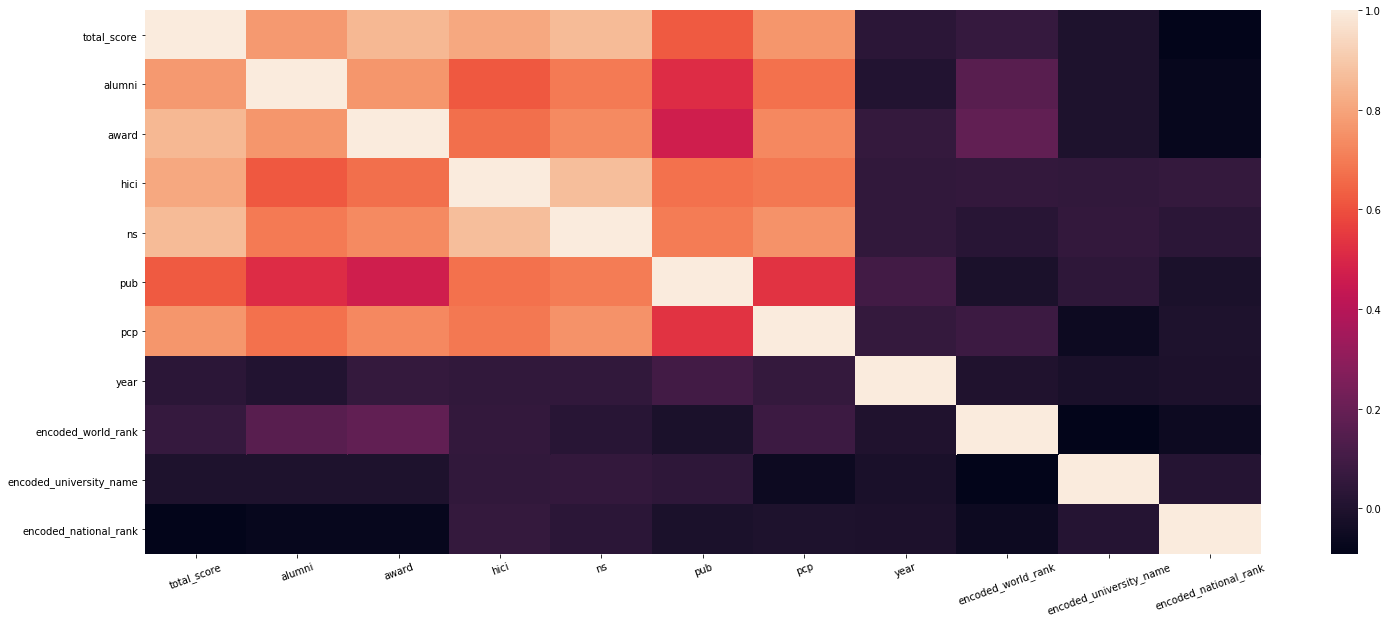

In [51]:
# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

In [56]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_for_visualization.copy()

In [58]:
# Remove the following columns/attributes-
cols_boxplot.remove("year")
cols_boxplot.remove("encoded_university_name")

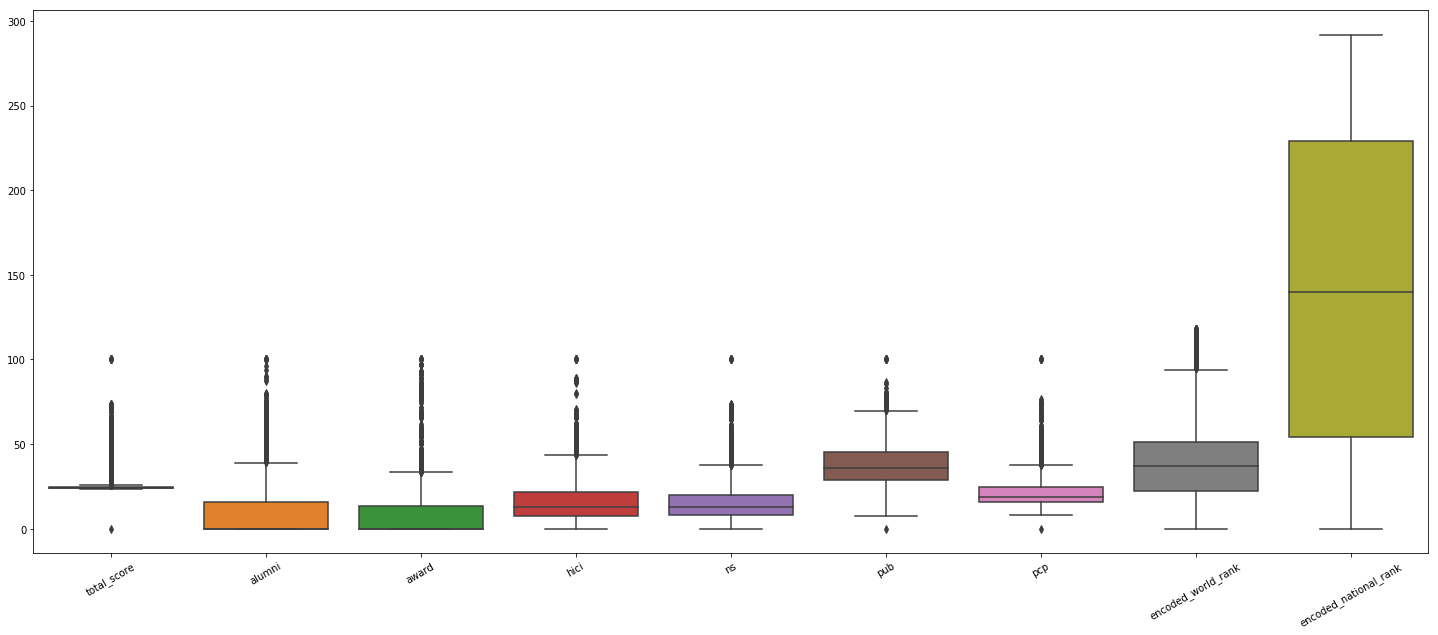

In [59]:
# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = shanghai_data_filled_na.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

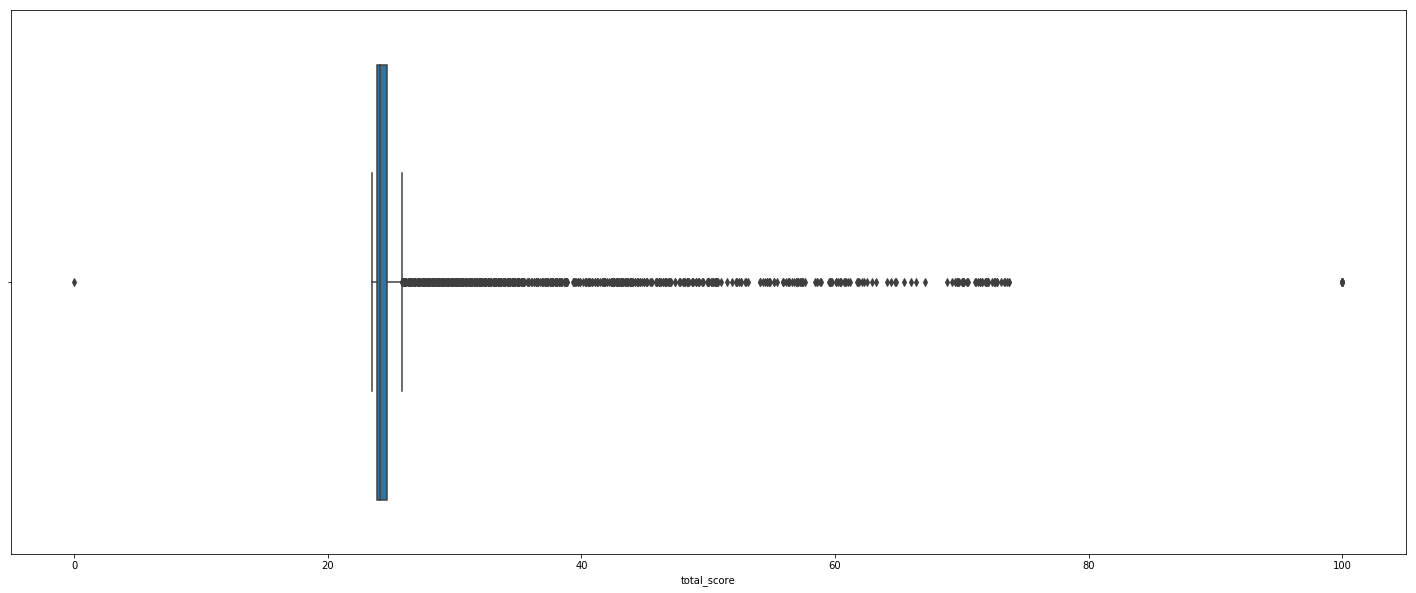

In [60]:
# Draw boxplot on x-axis to visualize any outliers for

# Boxplot for 'total_score' attribute-
sns.boxplot(shanghai_data_filled_na['total_score'])

plt.show()

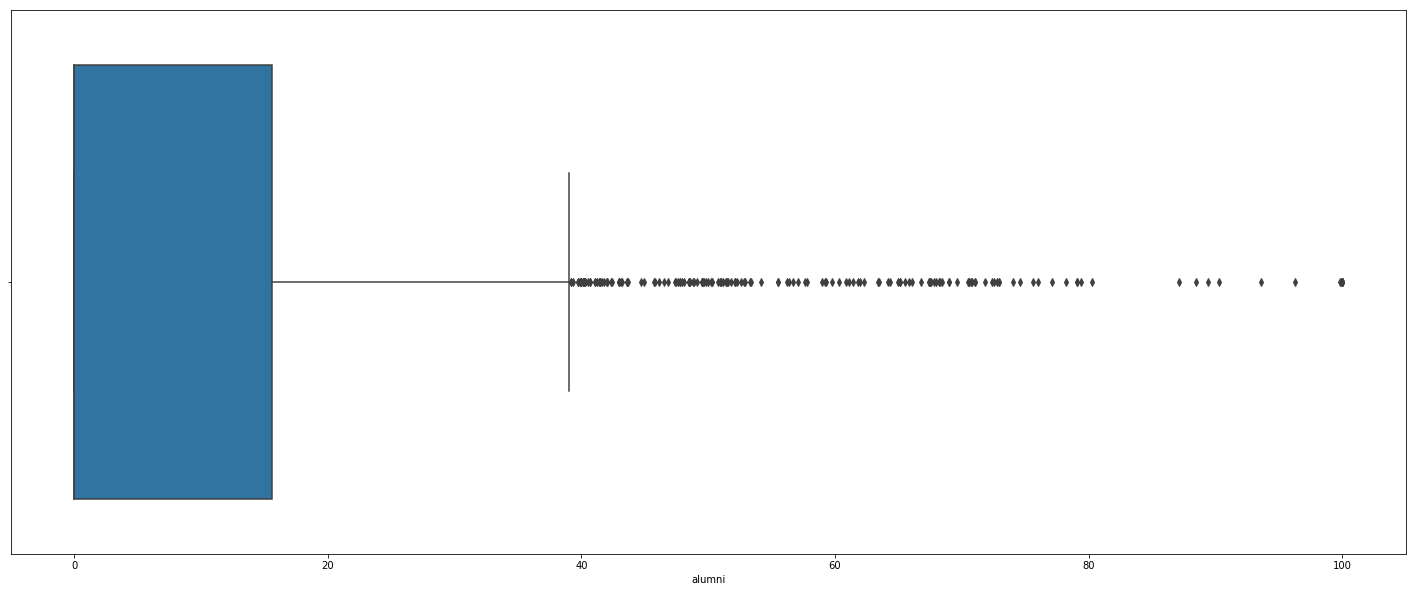

In [61]:
# Boxplot for 'alumni' attribute-
sns.boxplot(shanghai_data_filled_na['alumni'])

plt.show()

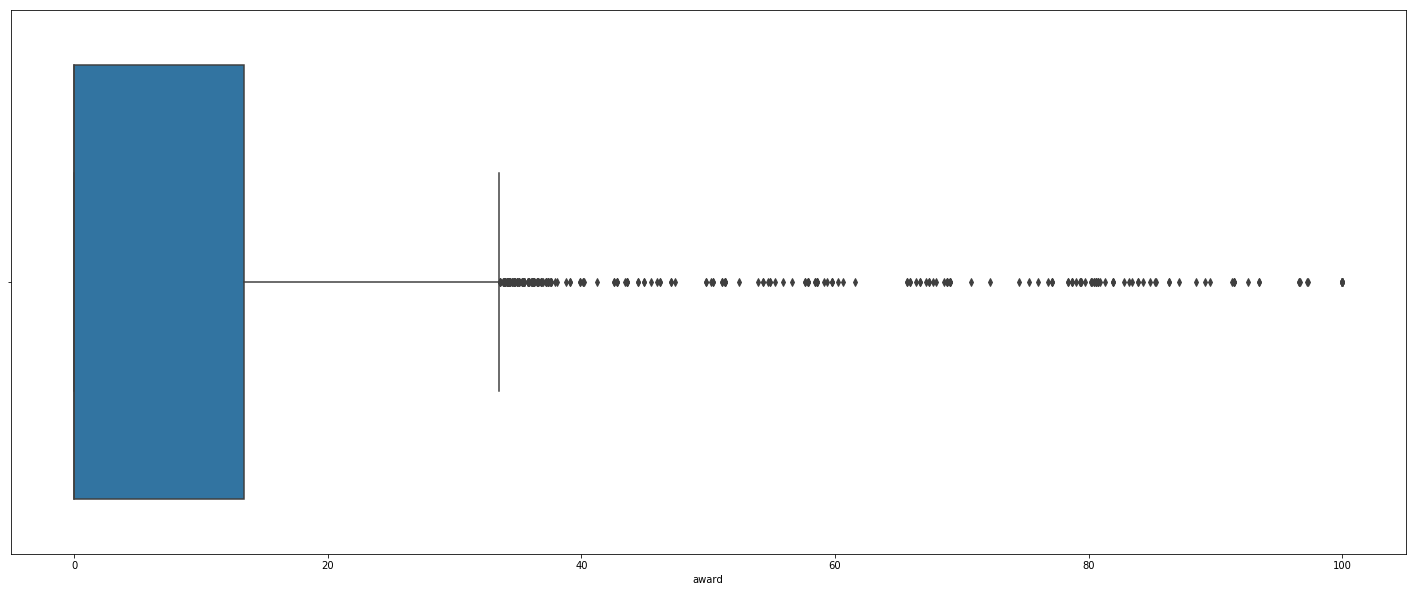

In [62]:
# Boxplot for 'award' attribute-
sns.boxplot(shanghai_data_filled_na['award'])

plt.show()

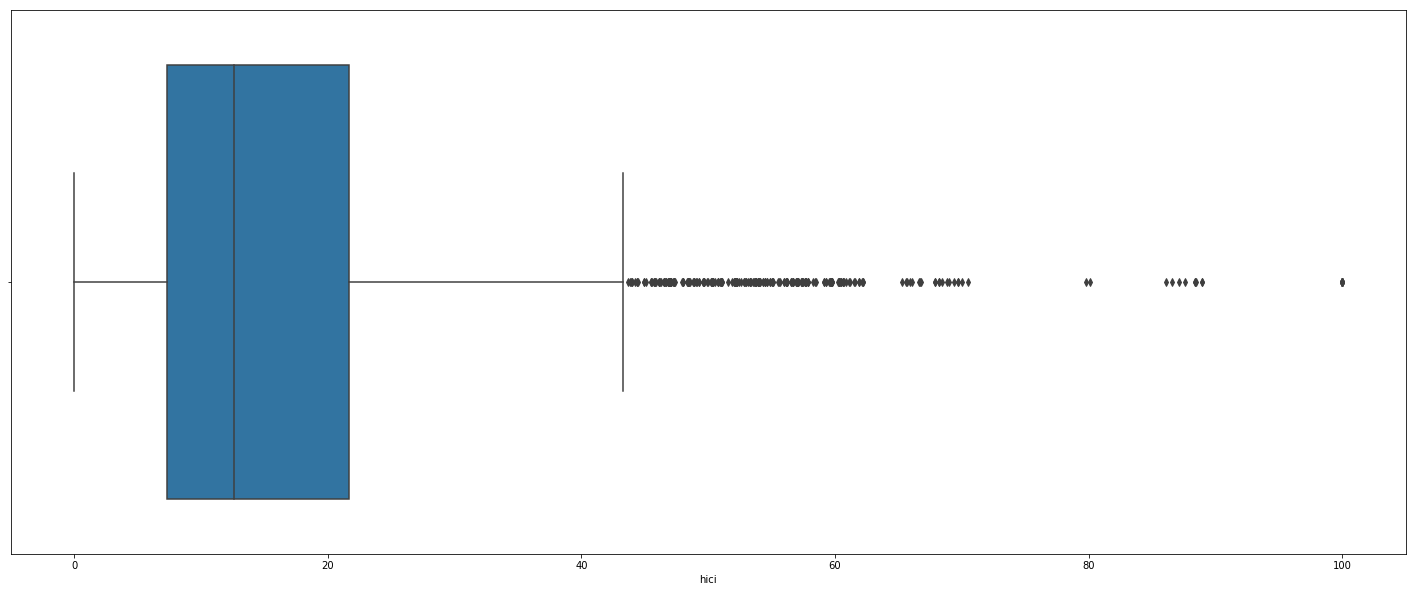

In [63]:
# Boxplot for 'hici' attribute-
sns.boxplot(shanghai_data_filled_na['hici'])

plt.show()

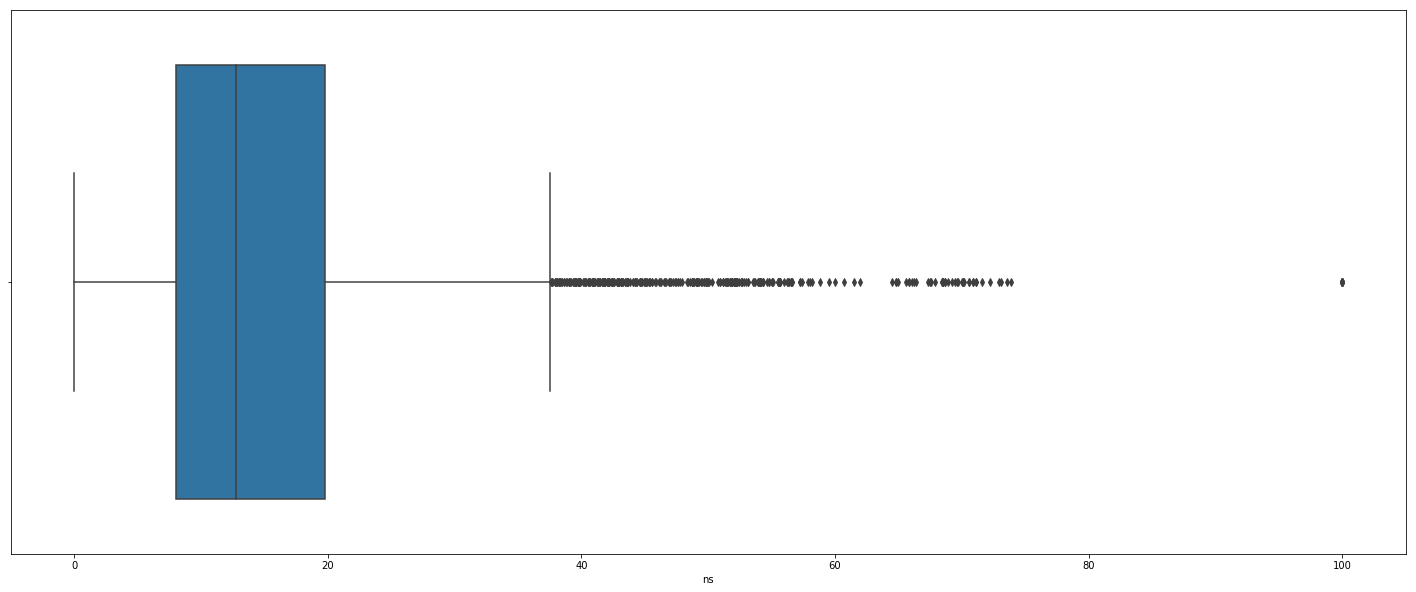

In [64]:
# Boxplot for 'ns' attribute-
sns.boxplot(shanghai_data_filled_na['ns'])

plt.show()

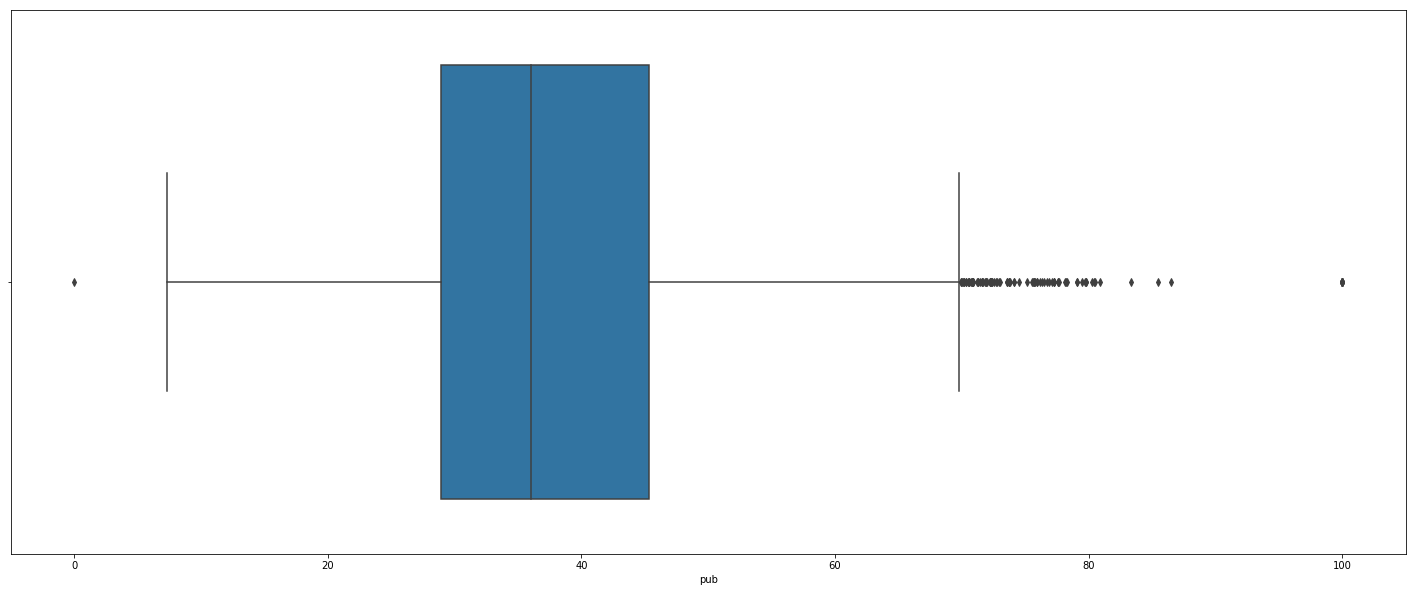

In [65]:
# Boxplot for 'pub' attribute-
sns.boxplot(shanghai_data_filled_na['pub'])

plt.show()

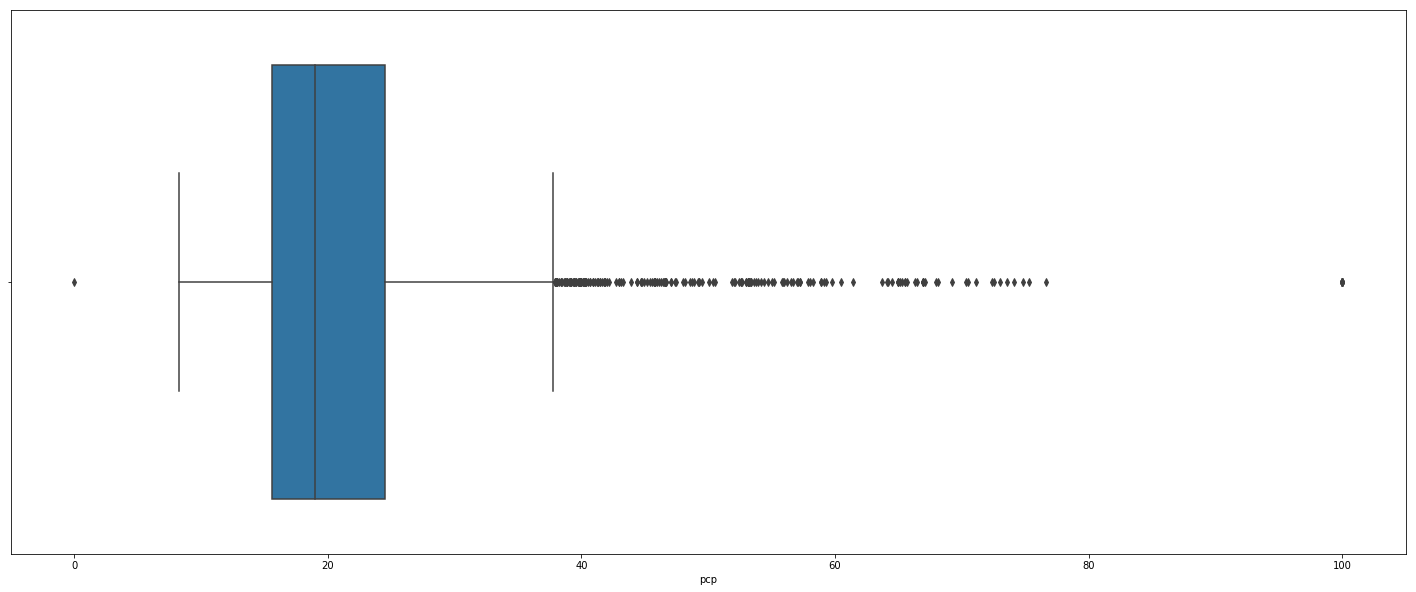

In [66]:
# Boxplot for 'pcp' attribute-
sns.boxplot(shanghai_data_filled_na['pcp'])

plt.show()

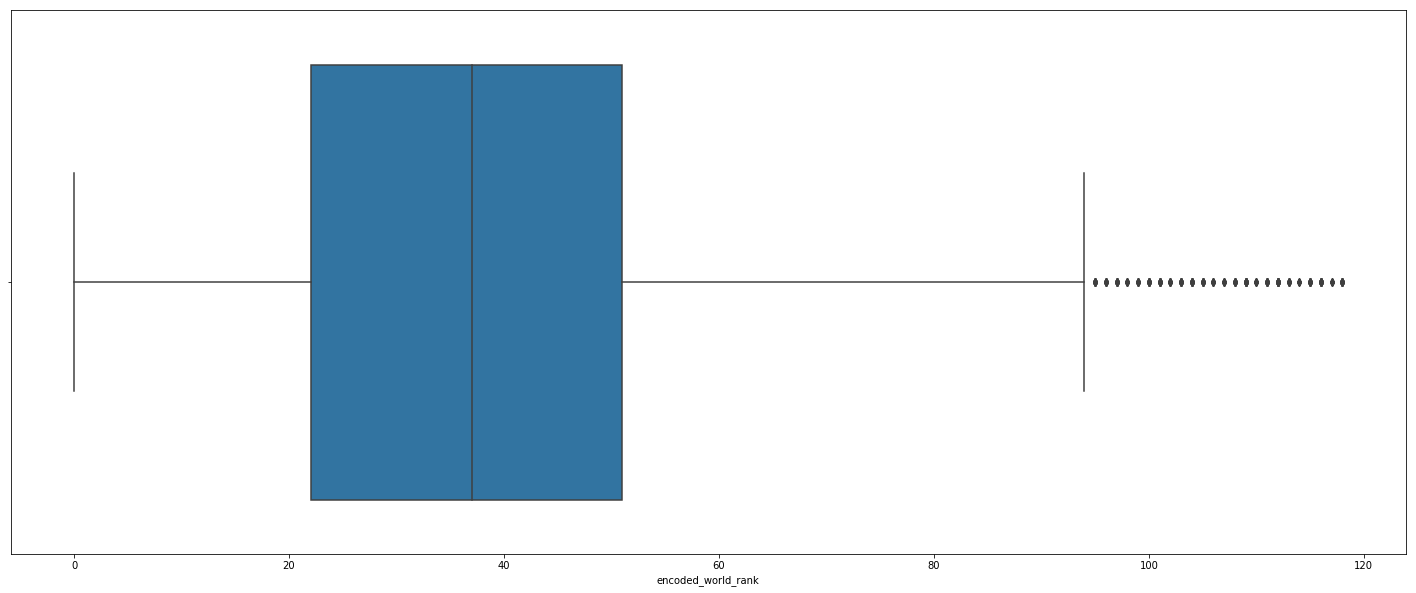

In [67]:
# Boxplot for 'encoded_world_rank' attribute-
sns.boxplot(shanghai_data_filled_na['encoded_world_rank'])

plt.show()